In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
columns_to_drop = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'Months_on_book',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1',
    'Attrition_Flag',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Months_Inactive_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Relationship_Count',
    'Contacts_Count_12_mon',
    'Total_Trans_Amt',
    'Total_Trans_Ct'
]

df = df.drop(columns_to_drop, axis=1)

In [ ]:
df

,CLIENTNUM,Customer_Age,Gender,Income_Category,Avg_Utilization_Ratio
0,768805383,45,M,$60K - $80K,0.061
1,818770008,49,F,Less than $40K,0.105
2,713982108,51,M,$80K - $120K,0.000
3,769911858,40,F,Less than $40K,0.760
4,709106358,40,M,$60K - $80K,0.000
...,...,...,...,...,...
10122,772366833,50,M,$40K - $60K,0.462
10123,710638233,41,M,$40K - $60K,0.511
10124,716506083,44,F,Less than $40K,0.000
10125,717406983,30,M,$40K - $60K,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CLIENTNUM              10127 non-null  int64  
 1   Customer_Age           10127 non-null  int64  
 2   Gender                 10127 non-null  object 
 3   Income_Category        10127 non-null  object 
 4   Avg_Utilization_Ratio  10127 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 395.7+ KB


In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000
mean,7.391776e+08,46.325960,0.274894
std,3.690378e+07,8.016814,0.275691
min,7.080821e+08,26.000000,0.000000
25%,7.130368e+08,41.000000,0.023000
50%,7.179264e+08,46.000000,0.176000
75%,7.731435e+08,52.000000,0.503000
max,8.283431e+08,73.000000,0.999000


In [ ]:
df.isnull().sum()

CLIENTNUM                0
Customer_Age             0
Gender                   0
Income_Category          0
Avg_Utilization_Ratio    0
dtype: int64

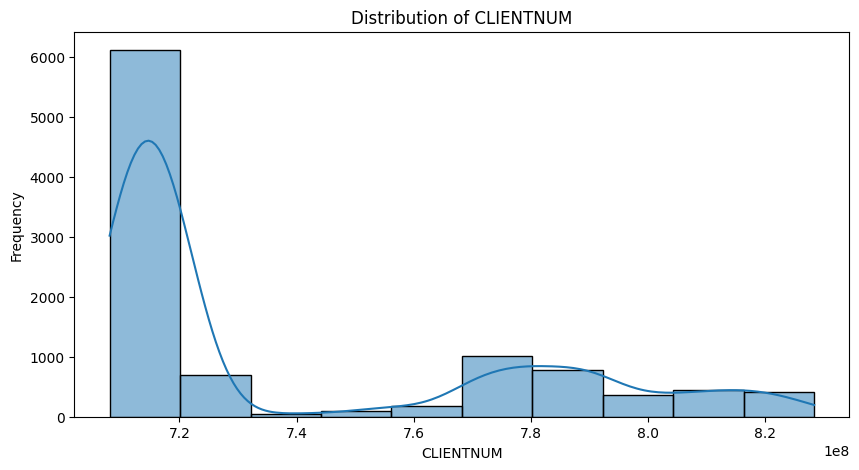

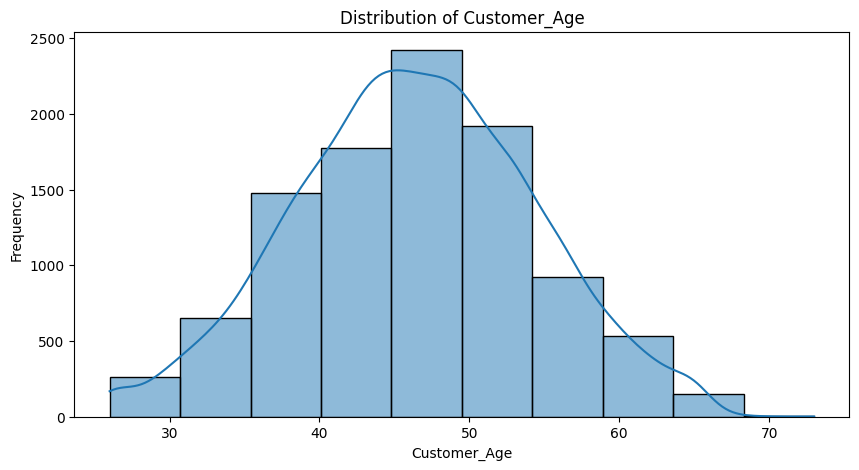

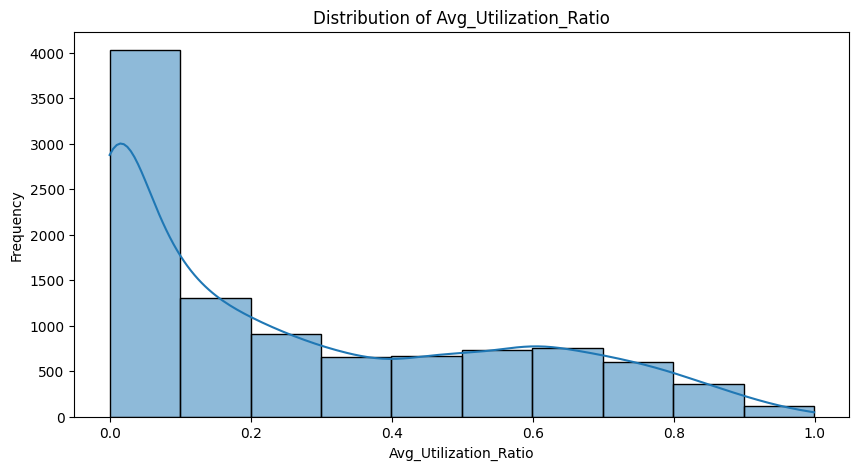

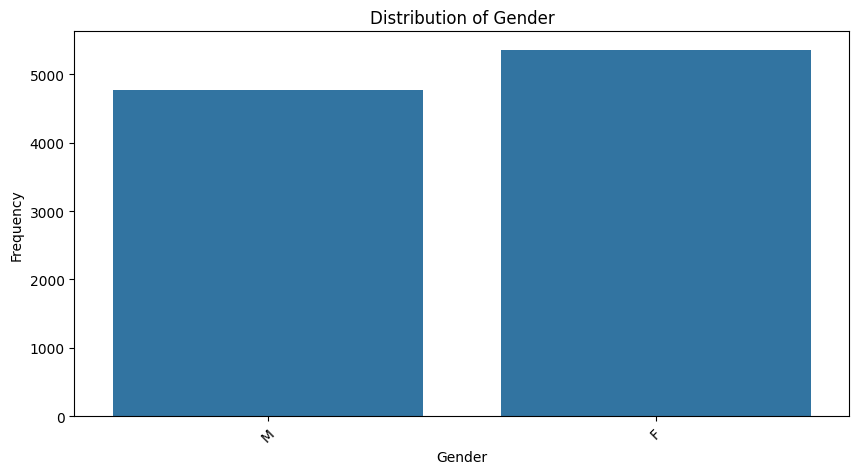

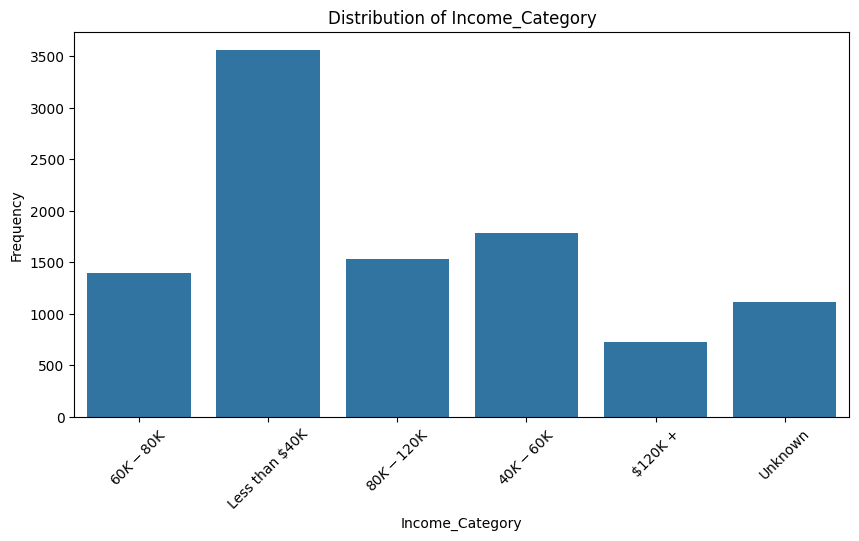

In [ ]:
def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns

    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True, bins=10)
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xlabel(column)
        plt.show()

# Memanggil fungsi untuk menampilkan distribusi tiap kolom numerik
plot_distributions(df)

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()

# Function call to plot the distribution of the 'Gender' column
plot_categorical_distribution(df, 'Gender')

# Function call to plot the distribution of the 'Income_Category' column
plot_categorical_distribution(df, 'Income_Category')

In [ ]:
# Define a dictionary to map income categories to numerical ranges
income_category_map = {
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    'Less than $40K': 1,
    '$120K +': 6,
    'Unknown': 0
}

# Apply the mapping function to the 'Income_Category' column
def map_income_category(category):
    if pd.isna(category):
        return None  # Handle missing values
    return income_category_map.get(category)

df['Income_Category_Numerical'] = df['Income_Category'].apply(map_income_category)

# Print the resulting DataFrame
print(df.to_string())

       CLIENTNUM  Customer_Age Gender Income_Category  Avg_Utilization_Ratio  Income_Category_Numerical
0      768805383            45      M     $60K - $80K                  0.061                          3
1      818770008            49      F  Less than $40K                  0.105                          1
2      713982108            51      M    $80K - $120K                  0.000                          4
3      769911858            40      F  Less than $40K                  0.760                          1
4      709106358            40      M     $60K - $80K                  0.000                          3
5      713061558            44      M     $40K - $60K                  0.311                          2
6      810347208            51      M         $120K +                  0.066                          6
7      818906208            32      M     $60K - $80K                  0.048                          3
8      710930508            37      M     $60K - $80K           

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Applying the function to the numerical columns
age_outliers = detect_outliers(df, "Customer_Age")
income_outliers = detect_outliers(df, "Income_Category_Numerical")
avg_utilization_ratio_outliers = detect_outliers(df, "Avg_Utilization_Ratio")

print("Age Outliers:")
print(age_outliers)
print("\nCategory Income Outliers:")
print(income_outliers)
print("\Average Utilization Outliers:")
print(avg_utilization_ratio_outliers)

Age Outliers:
     CLIENTNUM  Customer_Age Gender Income_Category  Avg_Utilization_Ratio  \
251  715952883            73      M     $40K - $60K                  0.252   
254  787348608            70      M  Less than $40K                  0.460   

     Income_Category_Numerical  
251                          2  
254                          1  

Category Income Outliers:
Empty DataFrame
Columns: [CLIENTNUM, Customer_Age, Gender, Income_Category, Avg_Utilization_Ratio, Income_Category_Numerical]
Index: []
\Average Utilization Outliers:
Empty DataFrame
Columns: [CLIENTNUM, Customer_Age, Gender, Income_Category, Avg_Utilization_Ratio, Income_Category_Numerical]
Index: []


In [ ]:
df_segm= df[["Customer_Age", "Income_Category_Numerical", "Avg_Utilization_Ratio"]].copy() #mengcopy kolom yang digunakan ke DataFrame baru df_segm

In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_segm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

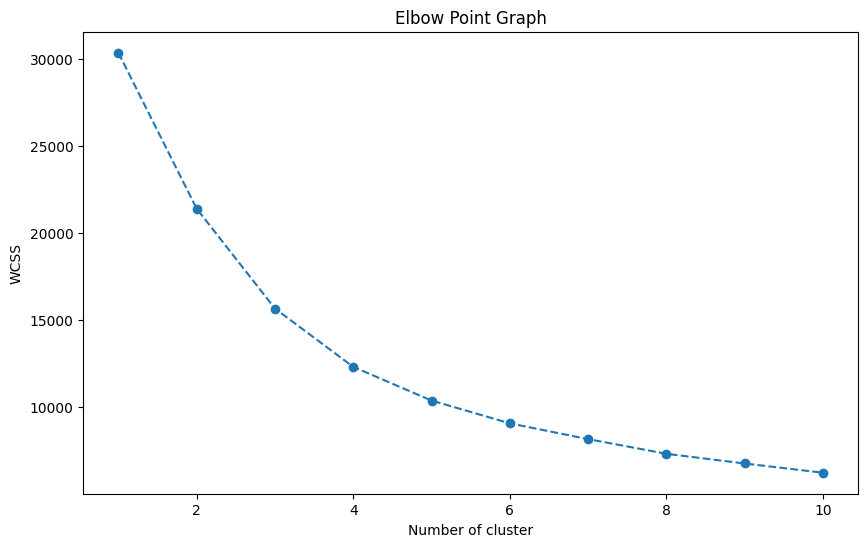

In [ ]:
#Menentukan nilai K (jumlah cluster)
wcss = [] #menyimpan nilai Within-Cluster-Sum-of-Squares utk jml cluster 1 hingga 11
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_) #return wcss value for an initialized cluster

#Mengeplot grafik nilai wcss
plt.figure(figsize = (10,6)) #membuat object figure (gambar) dg size 12x9 inch
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--') #mengeplot nilai wcss utk jml cluster 1 hingga 11
plt.xlabel('Number of cluster') #set label sumbu x
plt.ylabel('WCSS') #set label sumbu y
plt.title ('Elbow Point Graph') #set judul plot
plt.show() #menampilkan plot

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_std)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_std, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.30077095321989494)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.3158152496639038)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.3048285216410795)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.29784419035586956)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.2903338797779885)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.28572750942961334)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.30191767134687647)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.2855934524421806)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.2978811031658118)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, silhouette score is 0.2986732845737937)


In [ ]:
kmeans= KMeans(n_clusters= 3, init = 'k-means++', random_state = 42) #memilih n_cluster = 3 #clustering kmeans dg nilai n_cluster = 3
kmeans.fit(df_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df_result = df_segm.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'Customer_Age']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan

df_analysis #menampilkan DataFrame df_segm_analysis

,Customer_Age,Income_Category_Numerical,Avg_Utilization_Ratio,Frequency,Percentage
Segment K-Means,,,,,
0,46.527880,4.096201,0.112197,3264,0.322307
1,46.096170,1.054605,0.109977,3681,0.363484
2,46.384664,1.444689,0.632562,3182,0.314210


In [ ]:
#Plot 3D hasil clustering

import plotly.graph_objs as go
#mengeset data yang akan diplot
trace = go.Scatter3d( #mengeset data tiap sumbu
    x= df_result['Customer_Age'],
    y= df_result['Avg_Utilization_Ratio'],
    z= df_result['Income_Category_Numerical'],
    mode='markers',
    marker=dict(color = df_result['Segment K-Means'])
)
data = [trace]

#mengeset layout dari plot yg akan dibuat
layout = go.Layout(
    title= 'Clusters',
    scene = dict( #mengeset label utk  tiap sumbu
            xaxis = dict(title  = 'Customer_Age'),
            yaxis = dict(title  = 'Avg_Utilization_Ratio'),
            zaxis = dict(title  = 'Income_Category_Numerical')
        )
)

fig = go.Figure(data=data, layout=layout) #membuat object figure (gambar) dengan isi konten=data dan layout yg telah diset sblmnya

import plotly as py
py.offline.iplot(fig) #menampilkan plot

In [ ]:
import plotly.graph_objs as go

# Create a list to store the traces for each cluster
traces = []

# Loop through each unique cluster label
for cluster in df_result['Segment K-Means'].unique():
    # Filter the data for the current cluster
    cluster_data = df_result[df_result['Segment K-Means'] == cluster]

    # Create a trace for the current cluster
    trace = go.Scatter3d(
        x=cluster_data['Customer_Age'],
        y=cluster_data['Avg_Utilization_Ratio'],
        z=cluster_data['Income_Category_Numerical'],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}'  # Set the name of the trace to display in the legend
    )

    # Add the trace to the list of traces
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Customer_Age'),
        yaxis=dict(title='Avg_Utilization_Ratio'),
        zaxis=dict(title='Income_Category_Numerical')
    )
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Display the plot
import plotly as py
py.offline.iplot(fig)